In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from collections import Counter
from numpy import unique
from numpy import reshape
from sklearn.model_selection import train_test_split
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a futur

In [2]:
path = r'E:/Data Sets'
df = pd.read_csv(os.path.join(path, 'Task-2.2-revised-data.csv'))
df1 = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df1.drop(columns = ['DATE'], inplace = True)

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df = df.loc[:,df.columns.str.contains('DUSSELDORF')]
df

,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5
1,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0
2,7,0.95,1.0161,0.12,0.07,0.0,7.1,6.9,9.1
3,8,0.86,1.0161,0.12,0.02,0.0,6.8,3.6,8.0
4,7,0.92,1.0161,0.12,0.62,0.0,7.7,6.2,11.0
...,...,...,...,...,...,...,...,...,...
22945,8,0.75,1.0214,1.13,0.20,6.4,17.8,13.6,21.4
22946,7,0.71,1.0186,1.13,0.20,4.9,19.4,15.4,23.9
22947,8,0.73,1.0196,1.13,0.20,4.0,18.2,13.4,22.0
22948,7,0.73,1.0176,1.13,0.20,6.9,16.7,11.9,21.1


In [4]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(df, df1, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 15)
(4590, 9) (4590, 15)


In [5]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [6]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [7]:
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.4189542483660131


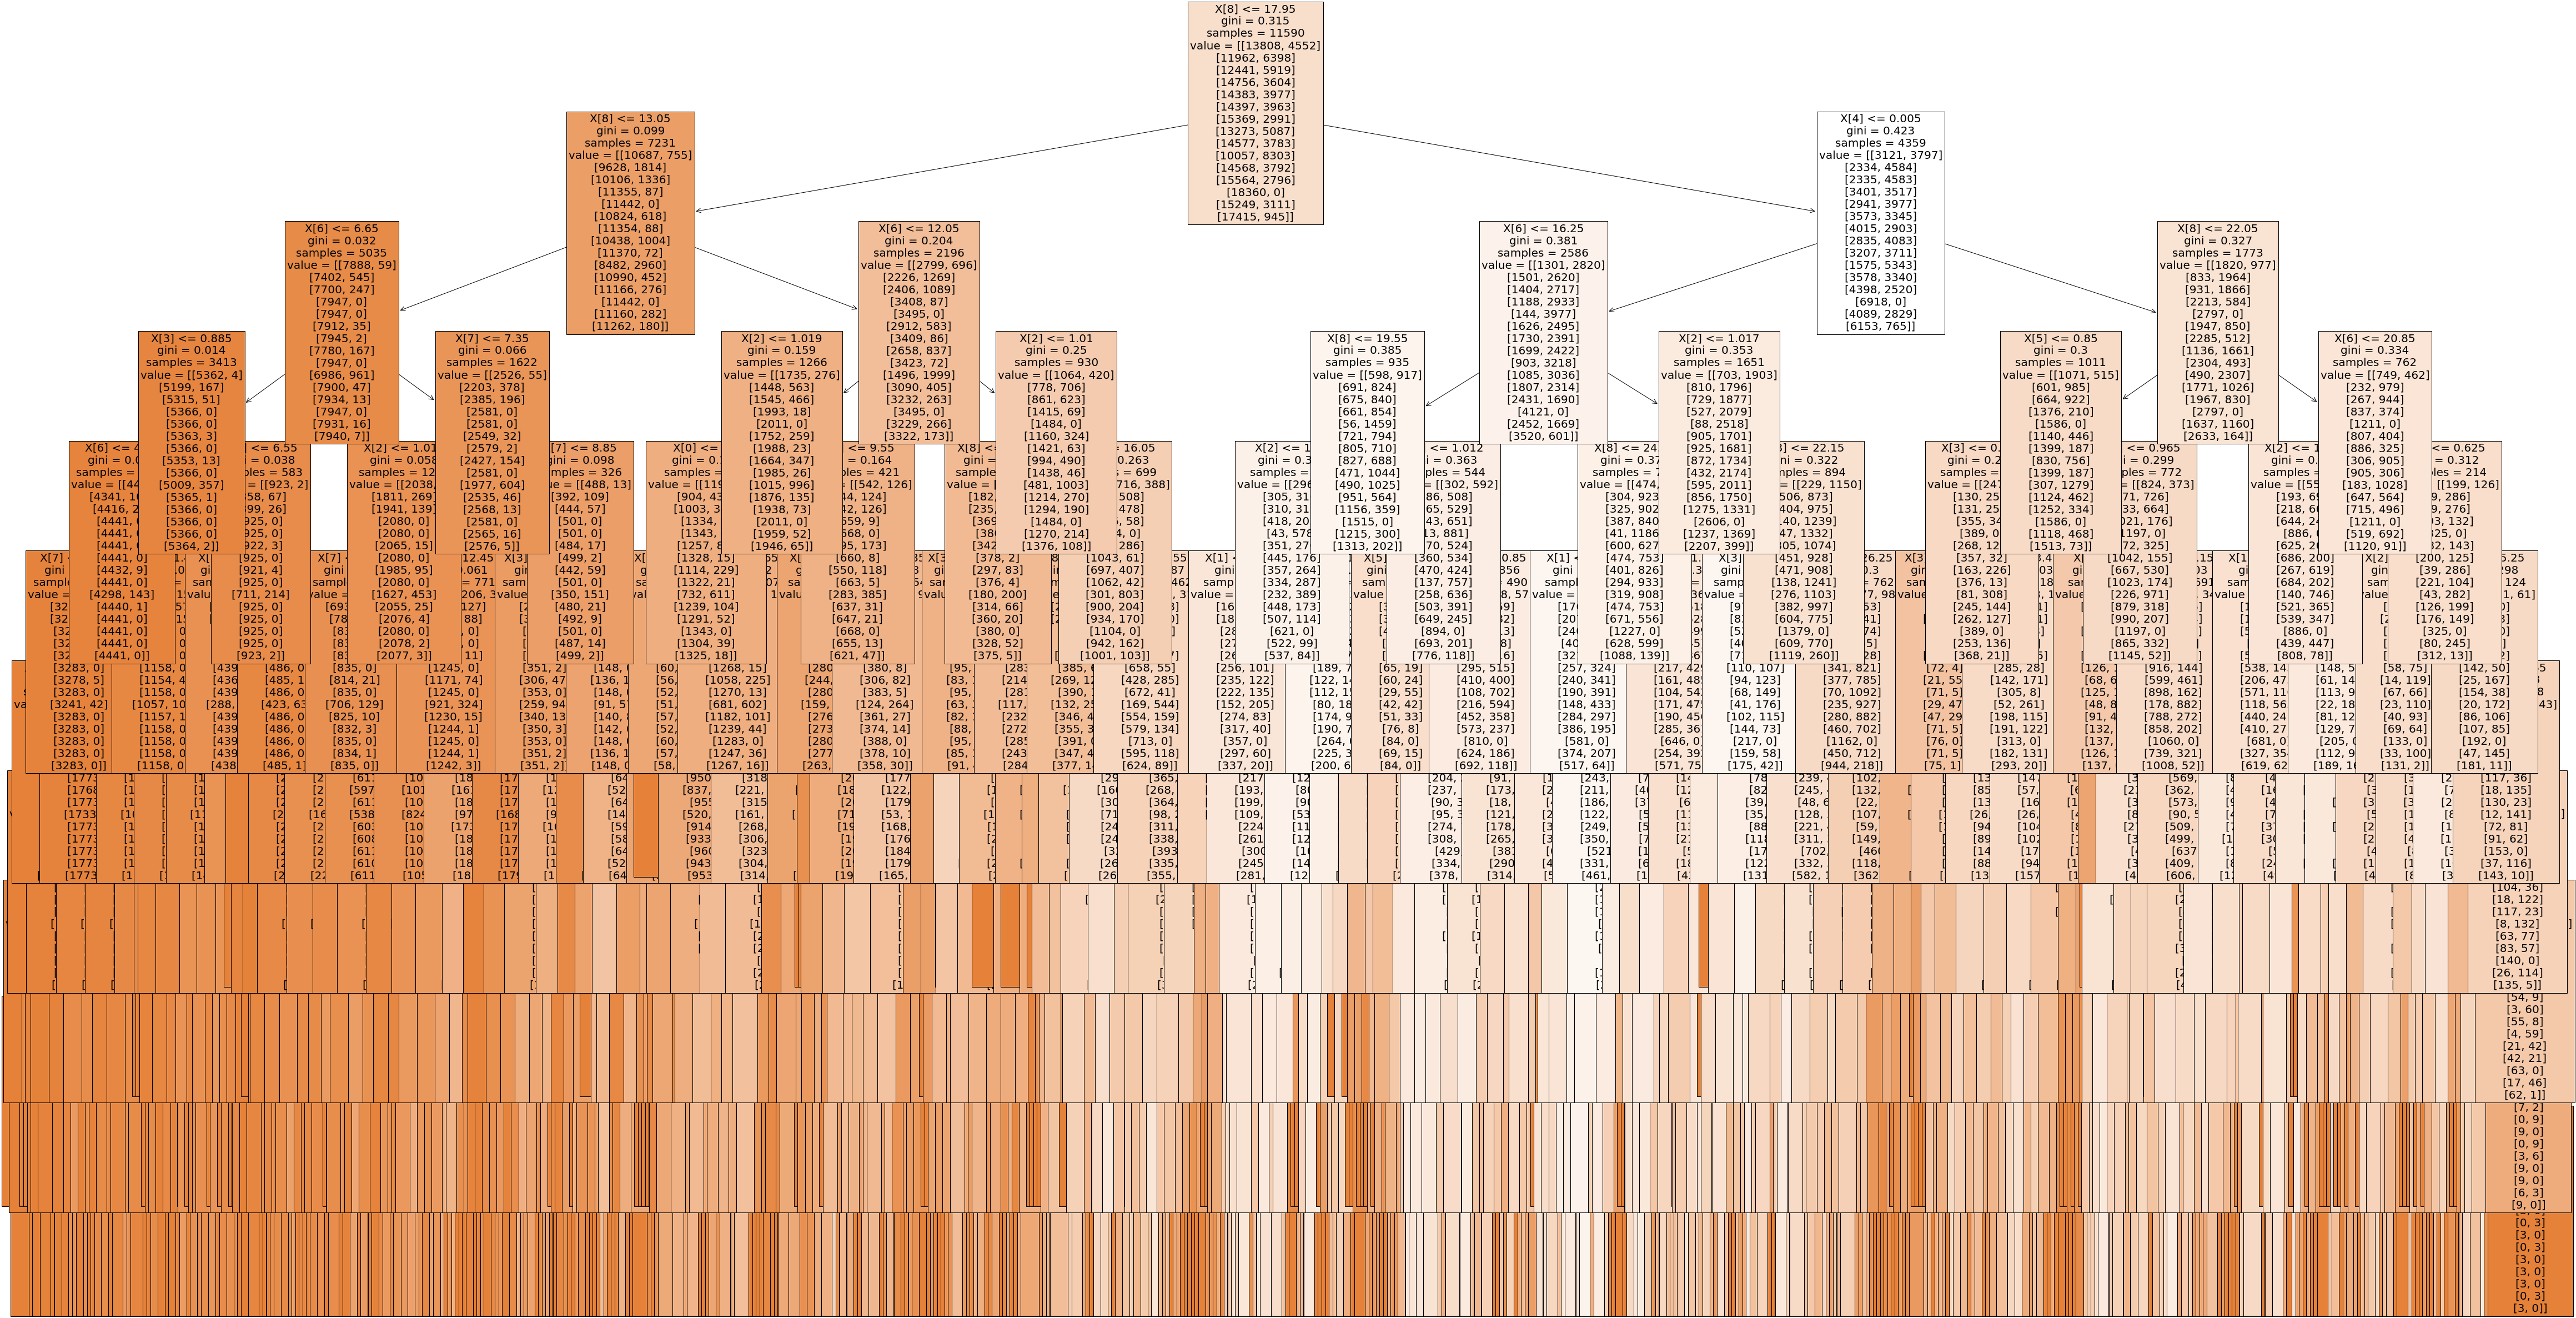

In [8]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [9]:
newarray = clf.feature_importances_
np.set_printoptions(threshold=1000)
newarray

array([0.03212903, 0.03415538, 0.04842368, 0.07371252, 0.1059358 ,
       0.06758543, 0.19938899, 0.1087003 , 0.32996887])

In [10]:
features = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']
important = pd.Series(newarray, index = features).sort_values(ascending = False)
important

temp_max            0.329969
temp_mean           0.199389
temp_min            0.108700
precipitation       0.105936
global_radiation    0.073713
sunshine            0.067585
pressure            0.048424
humidity            0.034155
cloud_cover         0.032129
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


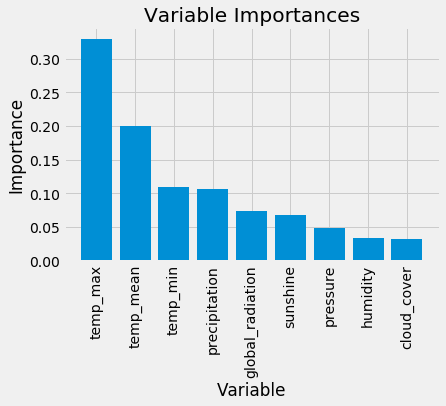

In [11]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(features)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');